Exploratory Data Analisys of Books.

Libraries installation with shell commands

In [1]:
%pip install pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


Libraries importation:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Selection  
For this Exploratory data Analisys i will be utilizing a kindle ebook dataset obtained from kaggle.  
This particular dataset contains an array of kindle books with their respective atributes and we will be focusing on the price, reviews and stars along with other boolean type information like if it is on kindle unlimited subscription, if it is BestSeller or if it is a GoodReadersChoice.  
This dataset was scraped on October 2023 and it was uploaded by user asaniczka and it can be accesed via the following link:  
https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books  

I chose this dataset because i am an avid reader and i find it really interesting finding the relations between the different atributes and how that impacts the book reviews and priceing.
  
In the following cells we will be showing the shape of the dataset along with the information about it includeing the descriptions of its atributes  

Atributes description (These descriptions where obtained directly from the dataset source):  
  
asin: Product ID from Amazon.  
title: Title of the book.  
author: Author(s) of the book.  
soldBy: Seller(s) of the book.  
imgUrl: URL of the book.  
productURL: URL to the publication on wich the ebook is sold.  
stars: Average rating of the book. If 0, no ratings were found.  
reviews: Number of reviews. If 0, no reviews were found.  
price: Price of the book. If 0, price was unavailable.  
isKindleUnlimited: Whether the book is available through Kindle Unlimited.  
category_id: Serial id assigned to the category this book belong to.  
isBestSeller: Whether the book had the Amazon Best Seller status or not.  
isEditorsPick: Whether the book had the Editor's Pick status or not.  
isGoodReadsChoice: Whether the book had the Goodreads Choice status or not.  
publishedDate: Publication date of the book.  
category_name: Name of the book category.

CSV File loading  
For working with this dataset i will be using the pandas library.  
In the next cell it will be loaded and we can apriciate the shape of the dataset.  

In [3]:
df = pd.read_csv('data/kindle_data-v2.csv')
df.shape


(133102, 16)

Atributes of the dataset  
Here we can see all the features of this dataset as described above:

In [4]:
print(df.columns)

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')


Following the later here is a example of how the dataset is composed using the head() function included with pandas

In [5]:
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


After loading the dataset into our environment i will aproach it by looking at its data types using the info() function.  
This i think is one of the best aproaches to a dataset because i can instantly identify which of my columns have null values and the data type of each colum which will allow me to devise how to adress them.  
We can also see how many entries (rows) and feaures (columns) we have to work with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

As shown before the dataset contains almost non-null information wich can be deceving because as described in the atributes section in most of the numerical attributes the null data is saved as 0.  
With that information in mind i will be utilizing the funtions value_counts() and the fucntion get() to se how many null information we have in the columns og price, reviews and stars. 

In [7]:
print("Price null values:",df['price'].value_counts().get(0, 0))
print("Reviews null values:",df['reviews'].value_counts().get(0, 0))
print("Stars null values:",df['stars'].value_counts().get(0, 0))

Price null values: 4066
Reviews null values: 64670
Stars null values: 3182


As seen on the shape of the dataset we have 133102 rows in the dataset making the 64670 missing values in reviews a concenring amount for the data cleaning and processing.  
And even with that we have several missing values in the price and stars fields that will requiere diffenrent considerations.  
Now because we can follow several paths to deal with this missing values for startes i will be proposing my hypothesys right now based on a simple overview of the data for it to be processed in the pursuit of the analaysis to be made to prove or discard them.  

So for now i will do several pairPlot using seaborn to try and understand how the missing data is distributed and ow it affects the dataset analysis.

Pair plot beteween all the features:

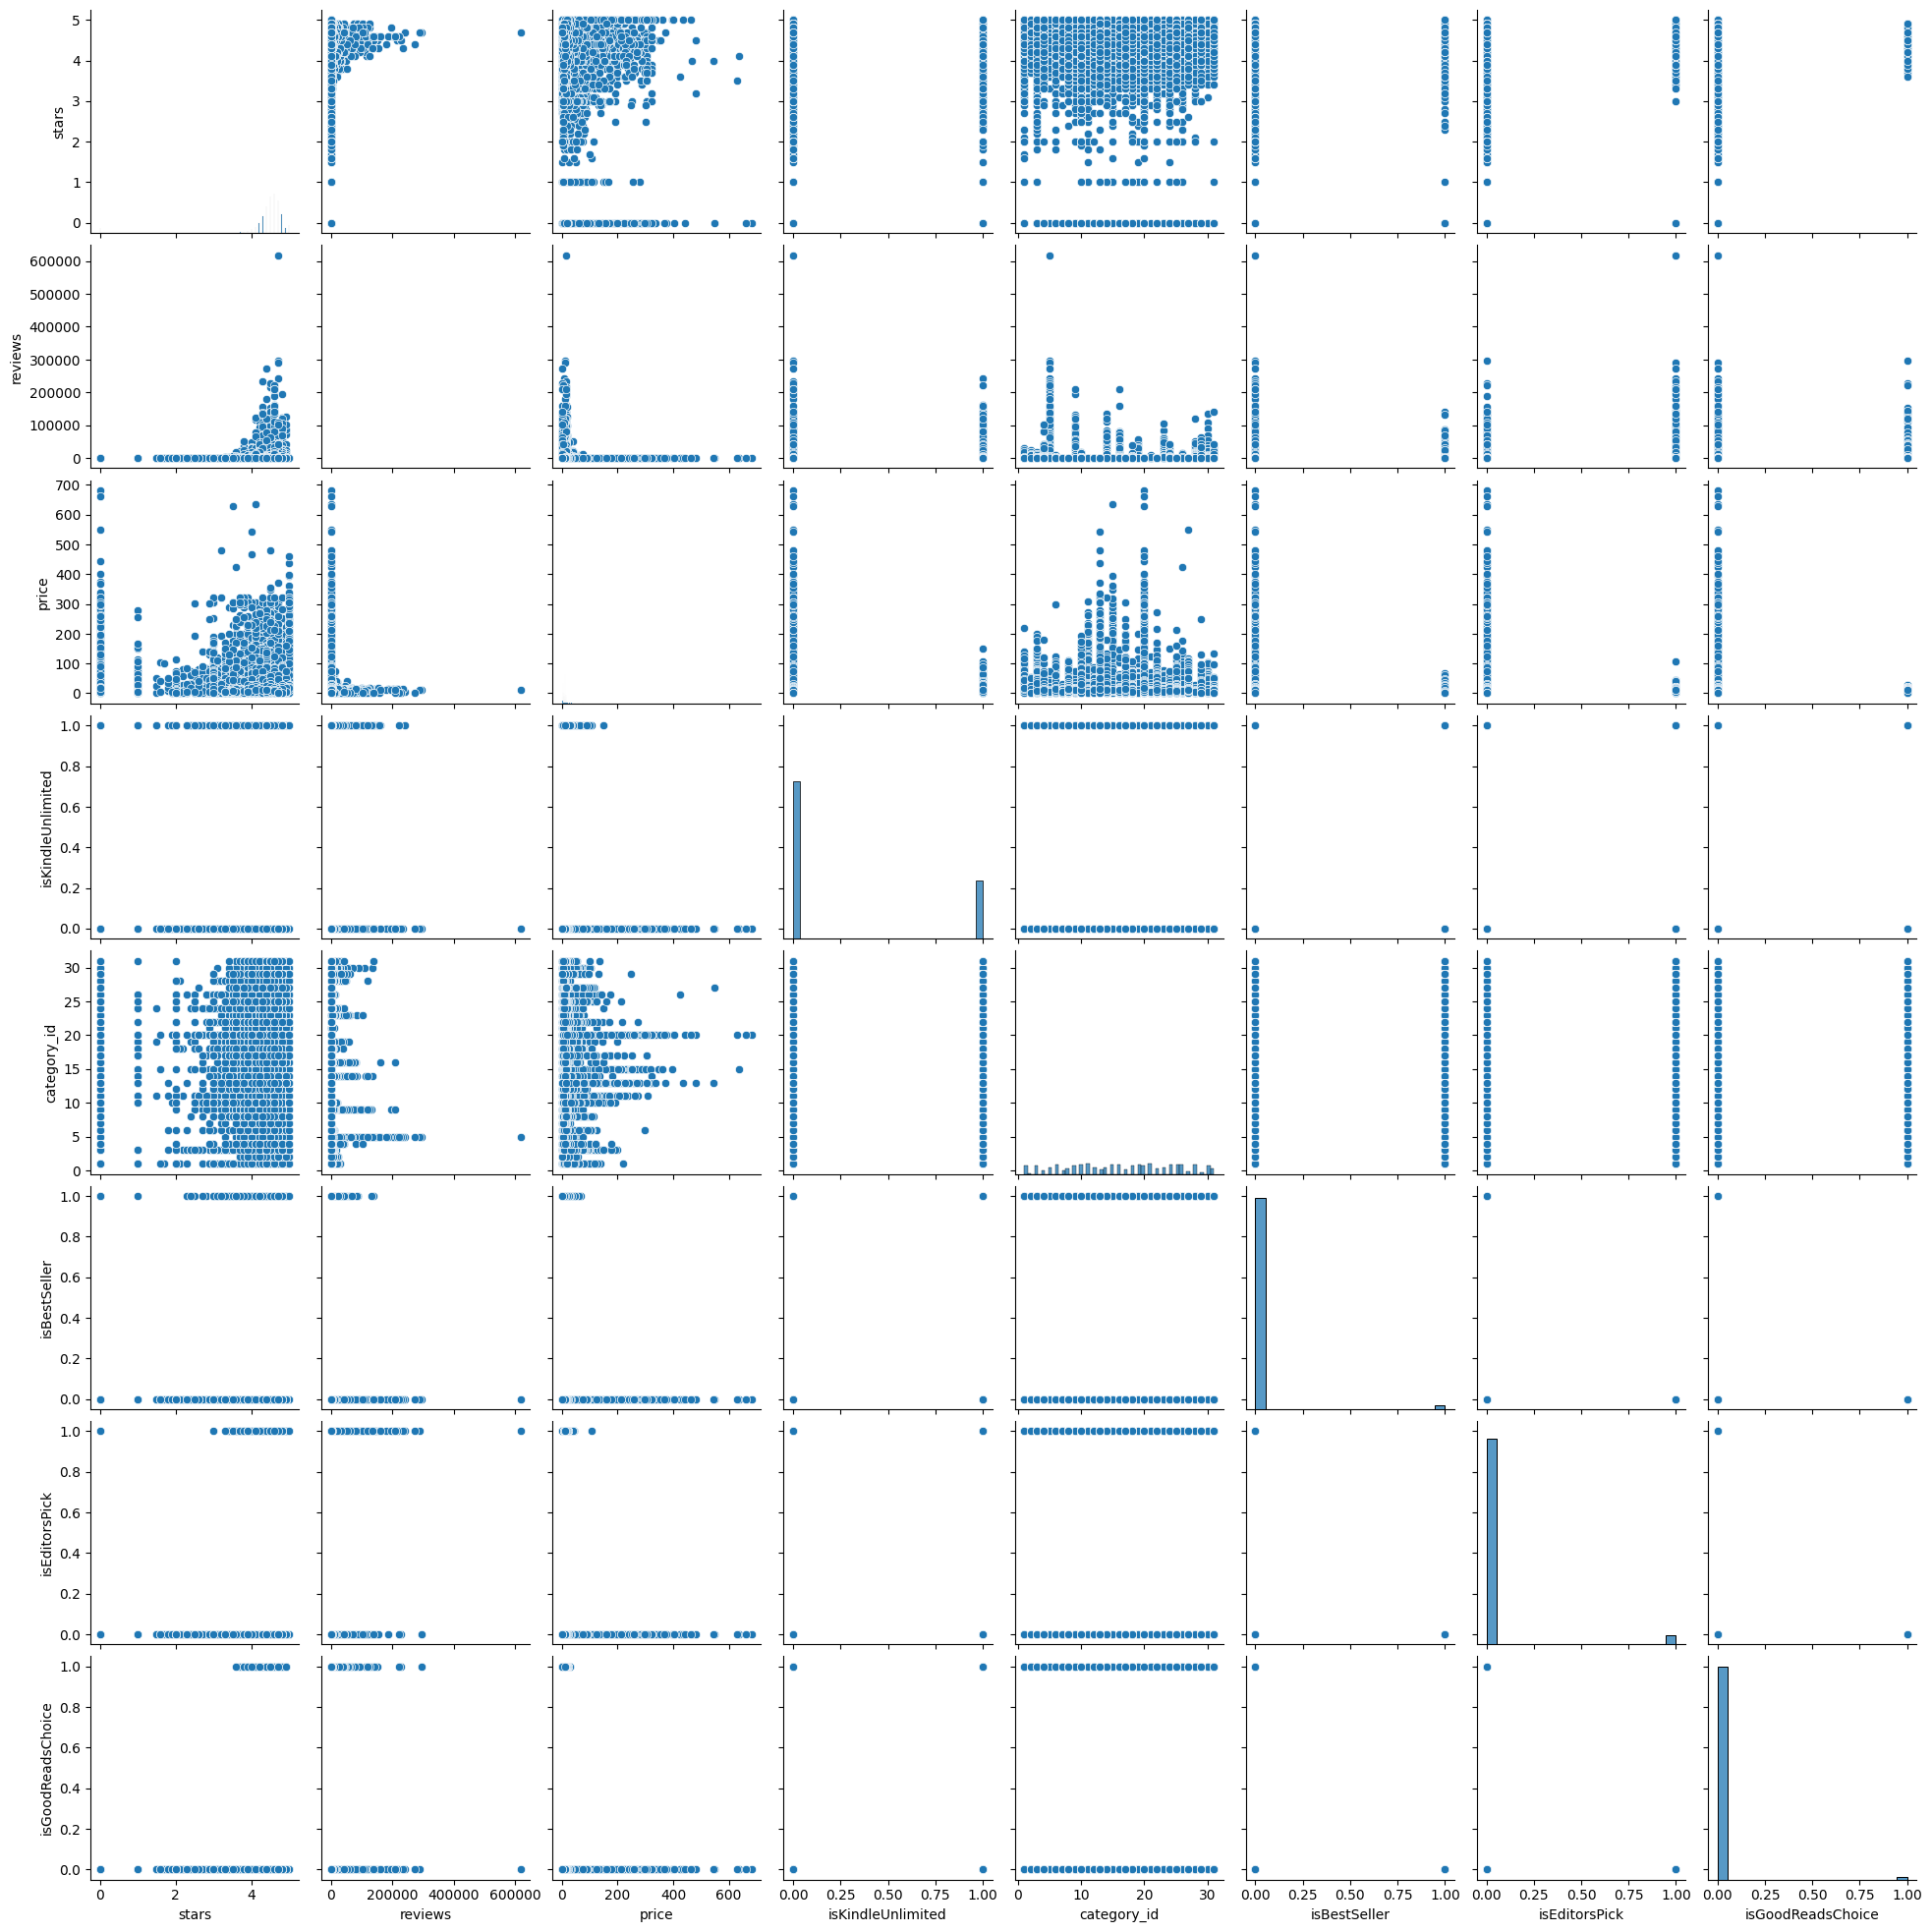

In [8]:
sns.pairplot(df)

Based on the last pairplot i deduce that there are some relations betweeen the data with the missing values and other categorical features such as category.  
Because of that i will create a pair plot of the dataset based on category_name.  

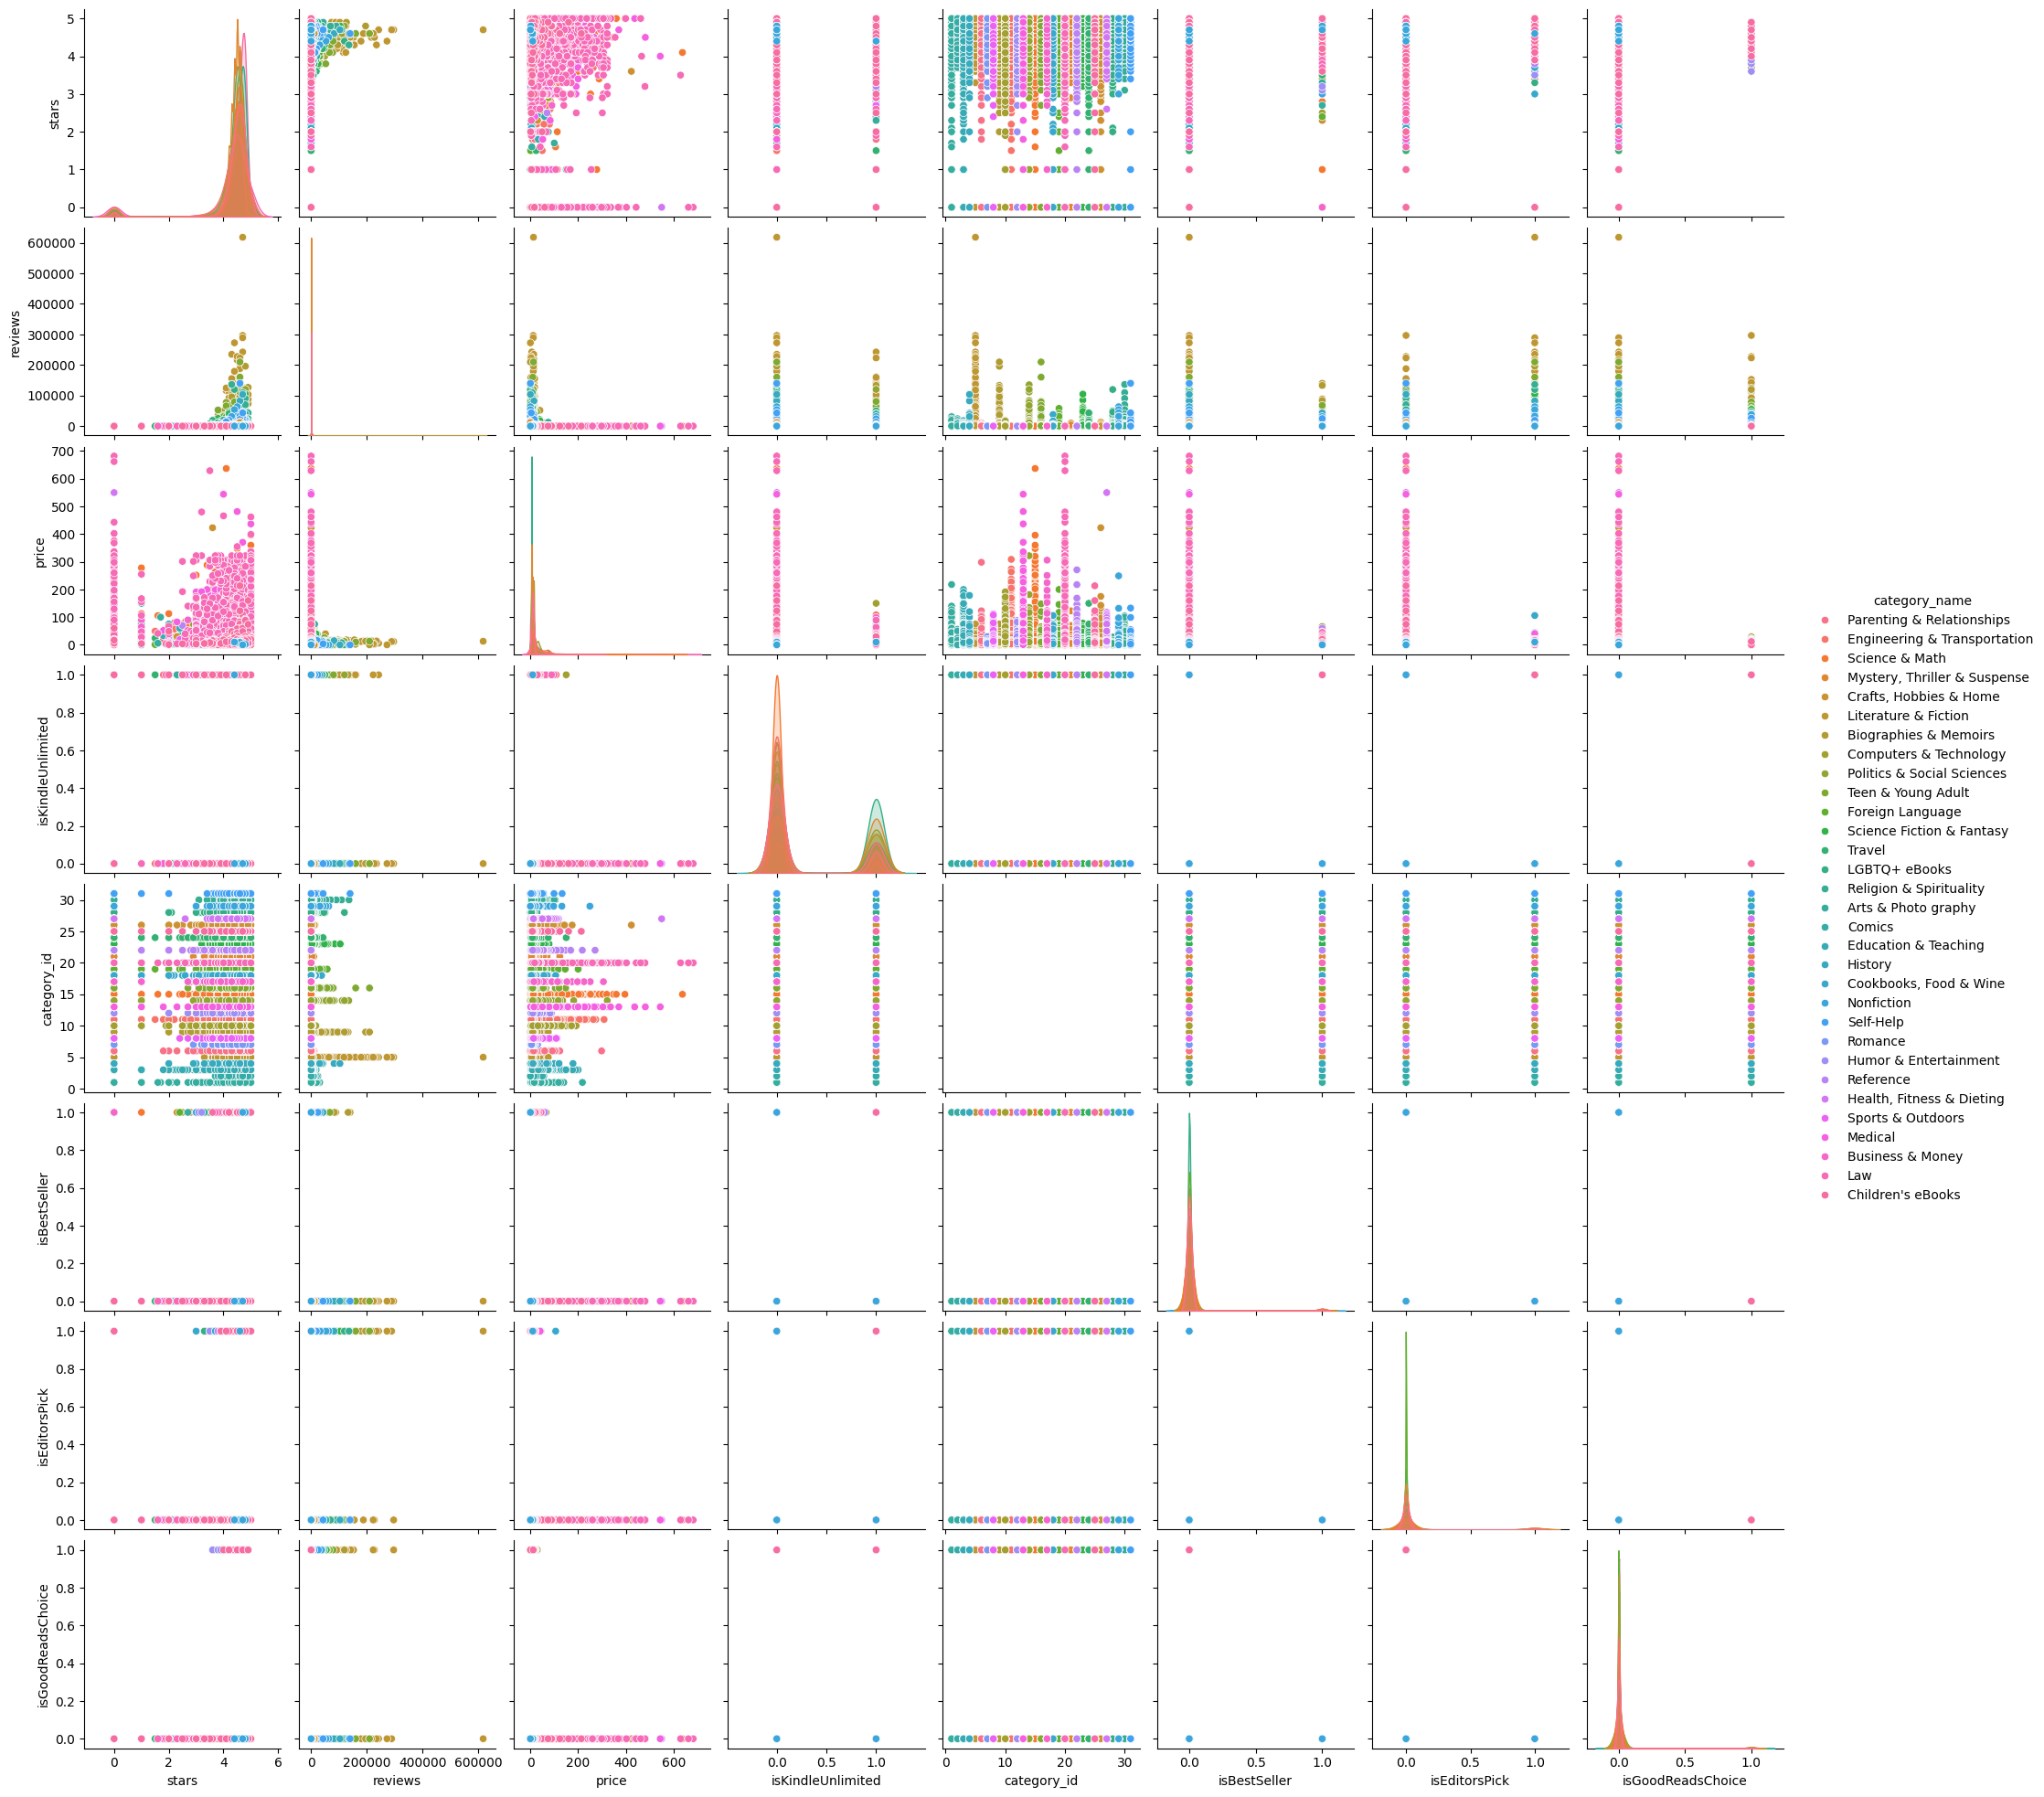

In [9]:
sns.pairplot(df, hue = 'category_name')

With this plot i see how the category may affect some of the other values such as price and maybe even identify some outliers wich i will deal with later.  
As for now i will plot the average price per category to dig deeper in this relationship to decide what how to proceed with the data cleaning.

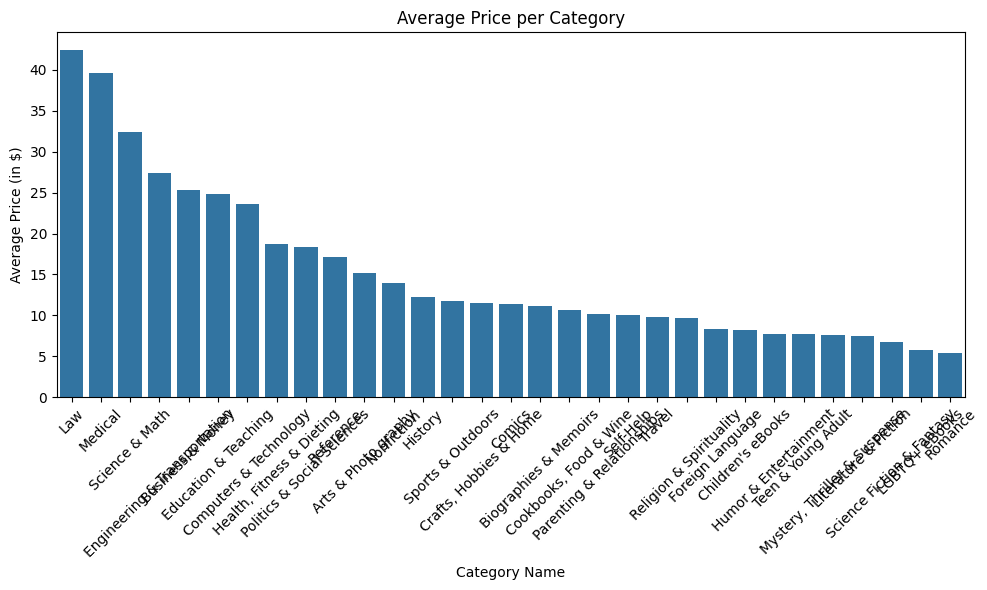

In [10]:
avg_price_per_category = df.groupby('category_name')['price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x='category_name', y='price', data=avg_price_per_category)

plt.title('Average Price per Category')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()                           

Based on the later i deduce that there is a relationship between the category and the price and that there could be other similar relationships with price and that they are affected too by the missing values. 
Therefore given that the missing values in price are not a substancial amount of the dataset i decided to ignore them and i will be eliminating them from a copy of the dataset to work with.
With this i only have to decide what to do with the other missing values in reviews and stars.

As for stars since there is not a substancial amount of missing values and that most rated book are more likely to not be very poorly reviewed i decided to impute them with the median.

Finaly for reviews since there is a lot of missing data and that the relationships seems minimal with the features other than stars i will ignore the whole column for the rest of this analysis.

Actual data cleaning and feature engeneering  
Here a will create a smaller dataset without the ignored features described above and without some other columns that we wont be using like the urls.

In [11]:
# Creation of a smaller dataset without the columns we wont be using
work_df = df.loc[:,['author','soldBy','stars','price','isKindleUnlimited','category_name','isBestSeller','isEditorsPick','isGoodReadsChoice','publishedDate']]
work_df.head()


,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,False,Parenting & Relationships,True,False,False,2015-06-01
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,False,Parenting & Relationships,False,False,False,2022-02-15
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,False,Parenting & Relationships,False,True,False,2022-09-13
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,True,Parenting & Relationships,False,True,False,2020-02-25
4,John Gottman,Random House LLC,4.7,13.99,False,Parenting & Relationships,False,False,False,2015-05-05


For easier handling of the missing values i will be replaceing all the ceroes on price and stars with pandas not a number NaN

In [12]:
work_df['price'] = work_df['price'].replace(0, pd.NA)
work_df['stars'] = work_df['stars'].replace(0, pd.NA)
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             132677 non-null  object
 1   soldBy             123869 non-null  object
 2   stars              129920 non-null  object
 3   price              129036 non-null  object
 4   isKindleUnlimited  133102 non-null  bool  
 5   category_name      133102 non-null  object
 6   isBestSeller       133102 non-null  bool  
 7   isEditorsPick      133102 non-null  bool  
 8   isGoodReadsChoice  133102 non-null  bool  
 9   publishedDate      84086 non-null   object
dtypes: bool(4), object(6)
memory usage: 6.6+ MB


Eliminating missing values rows from price:

In [13]:
work_df =work_df.dropna(subset=['price'])
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129036 entries, 0 to 133099
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   author             128627 non-null  object
 1   soldBy             122322 non-null  object
 2   stars              125952 non-null  object
 3   price              129036 non-null  object
 4   isKindleUnlimited  129036 non-null  bool  
 5   category_name      129036 non-null  object
 6   isBestSeller       129036 non-null  bool  
 7   isEditorsPick      129036 non-null  bool  
 8   isGoodReadsChoice  129036 non-null  bool  
 9   publishedDate      81556 non-null   object
dtypes: bool(4), object(6)
memory usage: 7.4+ MB


Next i will be imputing the stars values.

In [14]:
# Step 1: Calculate the median for non-zero stars
median_stars = work_df.loc[work_df['stars'] > 0, 'stars'].median()

# Step 2: Replace missing values (stars == 0) with the median
work_df['stars'] = work_df['stars'].replace(pd.NA, median_stars)

# Verify the changes
work_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 129036 entries, 0 to 133099
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             128627 non-null  object 
 1   soldBy             122322 non-null  object 
 2   stars              129036 non-null  float64
 3   price              129036 non-null  object 
 4   isKindleUnlimited  129036 non-null  bool   
 5   category_name      129036 non-null  object 
 6   isBestSeller       129036 non-null  bool   
 7   isEditorsPick      129036 non-null  bool   
 8   isGoodReadsChoice  129036 non-null  bool   
 9   publishedDate      81556 non-null   object 
dtypes: bool(4), float64(1), object(5)
memory usage: 7.4+ MB


C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\1091078338.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  work_df['stars'] = work_df['stars'].replace(pd.NA, median_stars)


Following the feature engeneering i will transform the date column into three separate ones.

In [15]:
work_df['publishedDate'] = pd.to_datetime(df['publishedDate'], format='%Y-%m-%d')
work_df['year'] = work_df['publishedDate'].dt.year
work_df['month'] = work_df['publishedDate'].dt.month
work_df['day'] = work_df['publishedDate'].dt.day

work_df.head()

,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,year,month,day
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,False,Parenting & Relationships,True,False,False,2015-06-01,2015.0,6.0,1.0
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,False,Parenting & Relationships,False,False,False,2022-02-15,2022.0,2.0,15.0
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,False,Parenting & Relationships,False,True,False,2022-09-13,2022.0,9.0,13.0
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,True,Parenting & Relationships,False,True,False,2020-02-25,2020.0,2.0,25.0
4,John Gottman,Random House LLC,4.7,13.99,False,Parenting & Relationships,False,False,False,2015-05-05,2015.0,5.0,5.0


To finish with the data cleaning and feature engenieering in will change all the boolean rows of the dataset to 0 and 1.


In [16]:
work_df = work_df.replace({True: 1, False: 0}).infer_objects(copy=False)
work_df.head()

C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\986787451.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  work_df = work_df.replace({True: 1, False: 0}).infer_objects(copy=False)


,author,soldBy,stars,price,isKindleUnlimited,category_name,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,year,month,day
0,Lindsay C. Gibson,Amazon.com Services LLC,4.8,9.99,0,Parenting & Relationships,1,0,0,2015-06-01,2015.0,6.0,1.0
1,Arthur C. Brooks,Penguin Group (USA) LLC,4.4,16.99,0,Parenting & Relationships,0,0,0,2022-02-15,2022.0,2.0,15.0
2,Becky Kennedy,HarperCollins Publishers,4.8,16.99,0,Parenting & Relationships,0,1,0,2022-09-13,2022.0,9.0,13.0
3,Dolly Alderton,HarperCollins Publishers,4.2,9.95,1,Parenting & Relationships,0,1,0,2020-02-25,2020.0,2.0,25.0
4,John Gottman,Random House LLC,4.7,13.99,0,Parenting & Relationships,0,0,0,2015-05-05,2015.0,5.0,5.0


Data insights:

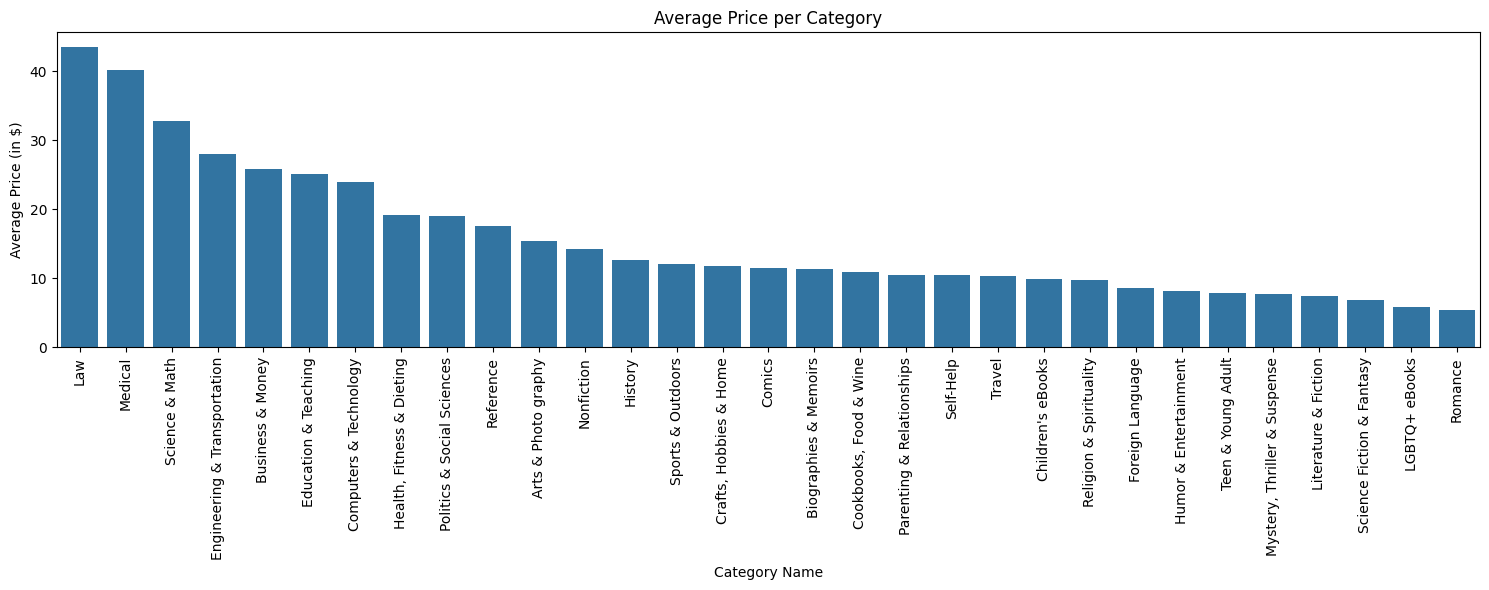

In [17]:
avg_price_per_category = work_df.groupby('category_name')['price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='price', ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x='category_name', y='price', data=avg_price_per_category)

plt.title('Average Price per Category')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=90)  
plt.tight_layout()

plt.show()      

In [18]:
print(work_df['stars'].mean())

4.512213645804272


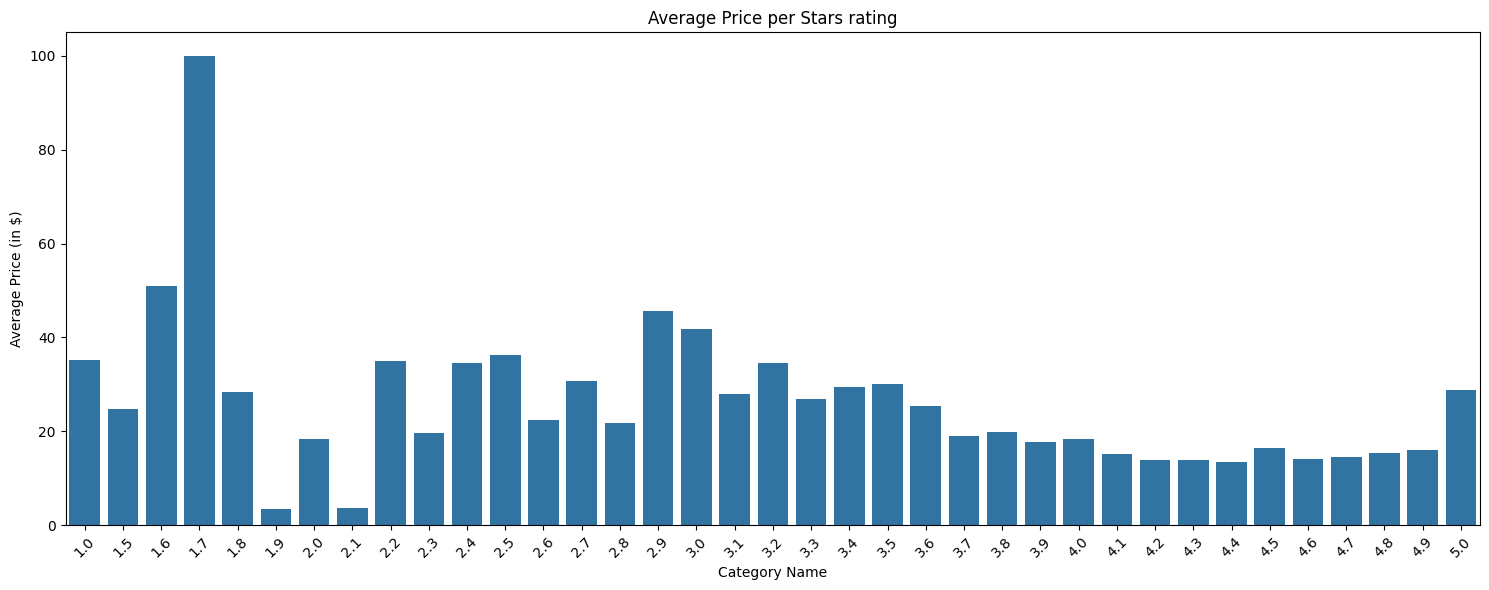

In [19]:
avg_price_per_stars_rating = work_df.groupby('stars')['price'].mean().reset_index()
avg_price_per_stars_rating = avg_price_per_stars_rating.sort_values(by='price', ascending=False)

plt.figure(figsize=(15, 6))

sns.barplot(x='stars', y='price', data=avg_price_per_stars_rating)

plt.title('Average Price per Stars rating')
plt.xlabel('Category Name')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()   

In [20]:
# Get the count of each star rating
stars_count = work_df['stars'].value_counts()

# Sort the result by stars rating
stars_count = stars_count.sort_index()

stars_count_equal_to_one = stars_count[stars_count == 1]

# Display the result
print(stars_count_equal_to_one)

stars
1.7    1
Name: count, dtype: int64


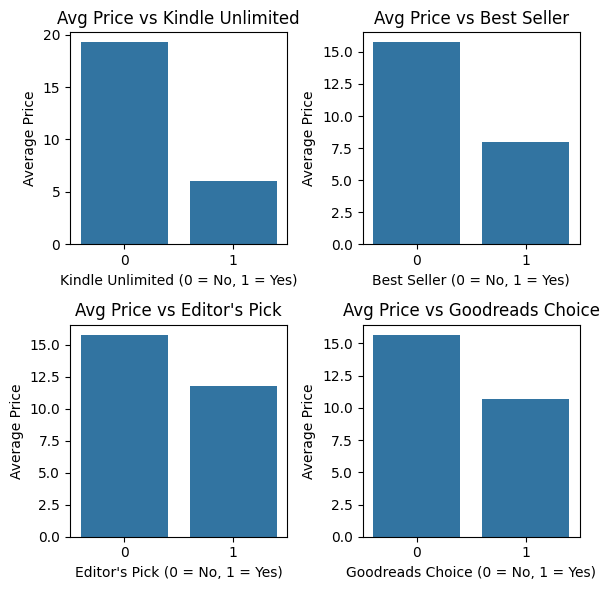

In [21]:
# Step 1: Group by each binary feature and calculate the average price
avg_price_kindle_unlimited = work_df.groupby('isKindleUnlimited')['price'].mean()
avg_price_best_seller = work_df.groupby('isBestSeller')['price'].mean()
avg_price_editors_pick = work_df.groupby('isEditorsPick')['price'].mean()
avg_price_goodreads_choice = work_df.groupby('isGoodReadsChoice')['price'].mean()

# Step 2: Create a subplot with 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Kindle Unlimited histogram
sns.barplot(x=avg_price_kindle_unlimited.index, y=avg_price_kindle_unlimited.values, ax=axes[0, 0])
axes[0, 0].set_title('Avg Price vs Kindle Unlimited')
axes[0, 0].set_xlabel('Kindle Unlimited (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Average Price')

# Best Seller histogram
sns.barplot(x=avg_price_best_seller.index, y=avg_price_best_seller.values, ax=axes[0, 1])
axes[0, 1].set_title('Avg Price vs Best Seller')
axes[0, 1].set_xlabel('Best Seller (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Average Price')

# Editor's Pick histogram
sns.barplot(x=avg_price_editors_pick.index, y=avg_price_editors_pick.values, ax=axes[1, 0])
axes[1, 0].set_title("Avg Price vs Editor's Pick")
axes[1, 0].set_xlabel("Editor's Pick (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel('Average Price')

# Goodreads Choice histogram
sns.barplot(x=avg_price_goodreads_choice.index, y=avg_price_goodreads_choice.values, ax=axes[1, 1])
axes[1, 1].set_title('Avg Price vs Goodreads Choice')
axes[1, 1].set_xlabel('Goodreads Choice (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Average Price')

# Step 3: Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
# Step 1: Group by each binary feature and calculate the average price
avg_stars_kindle_unlimited = work_df.groupby('isKindleUnlimited')['stars'].mean()
avg_stars_best_seller = work_df.groupby('isBestSeller')['stars'].mean()
avg_stars_editors_pick = work_df.groupby('isEditorsPick')['stars'].mean()
avg_stars_goodreads_choice = work_df.groupby('isGoodReadsChoice')['stars'].mean()

print(avg_stars_kindle_unlimited)
print(avg_stars_best_seller)
print(avg_stars_editors_pick)
print(avg_stars_goodreads_choice)

isKindleUnlimited
0    4.527312
1    4.472458
Name: stars, dtype: float64
isBestSeller
0    4.512481
1    4.496362
Name: stars, dtype: float64
isEditorsPick
0    4.514396
1    4.461721
Name: stars, dtype: float64
isGoodReadsChoice
0    4.51229
1    4.50456
Name: stars, dtype: float64


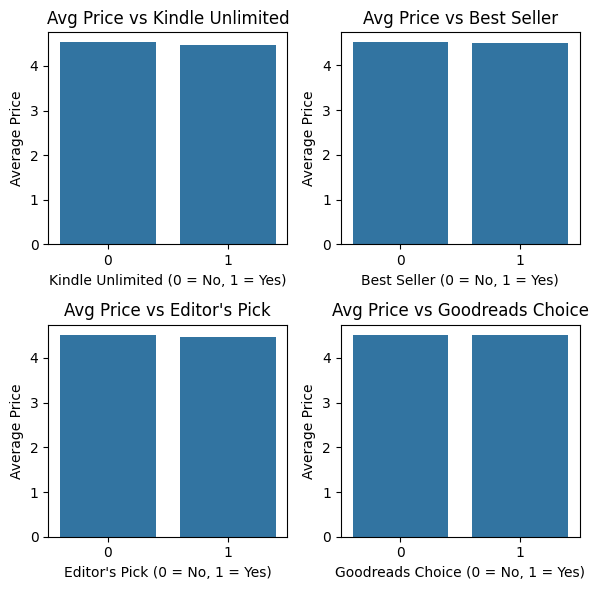

In [23]:
# Step 2: Create a subplot with 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Kindle Unlimited histogram
sns.barplot(x=avg_stars_kindle_unlimited.index, y=avg_stars_kindle_unlimited.values, ax=axes[0, 0])
axes[0, 0].set_title('Avg Price vs Kindle Unlimited')
axes[0, 0].set_xlabel('Kindle Unlimited (0 = No, 1 = Yes)')
axes[0, 0].set_ylabel('Average Price')

# Best Seller histogram
sns.barplot(x=avg_stars_best_seller.index, y=avg_stars_best_seller.values, ax=axes[0, 1])
axes[0, 1].set_title('Avg Price vs Best Seller')
axes[0, 1].set_xlabel('Best Seller (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Average Price')

# Editor's Pick histogram
sns.barplot(x=avg_stars_editors_pick.index, y=avg_stars_editors_pick.values, ax=axes[1, 0])
axes[1, 0].set_title("Avg Price vs Editor's Pick")
axes[1, 0].set_xlabel("Editor's Pick (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel('Average Price')

# Goodreads Choice histogram
sns.barplot(x=avg_stars_goodreads_choice.index, y=avg_stars_goodreads_choice.values, ax=axes[1, 1])
axes[1, 1].set_title('Avg Price vs Goodreads Choice')
axes[1, 1].set_xlabel('Goodreads Choice (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Average Price')

# Step 3: Adjust layout and display the plots
plt.tight_layout()
plt.show()

C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\711640241.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(avg_rating_by_category.index, rotation=90)
C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\711640241.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(avg_bestseller_by_category.index, rotation=90)


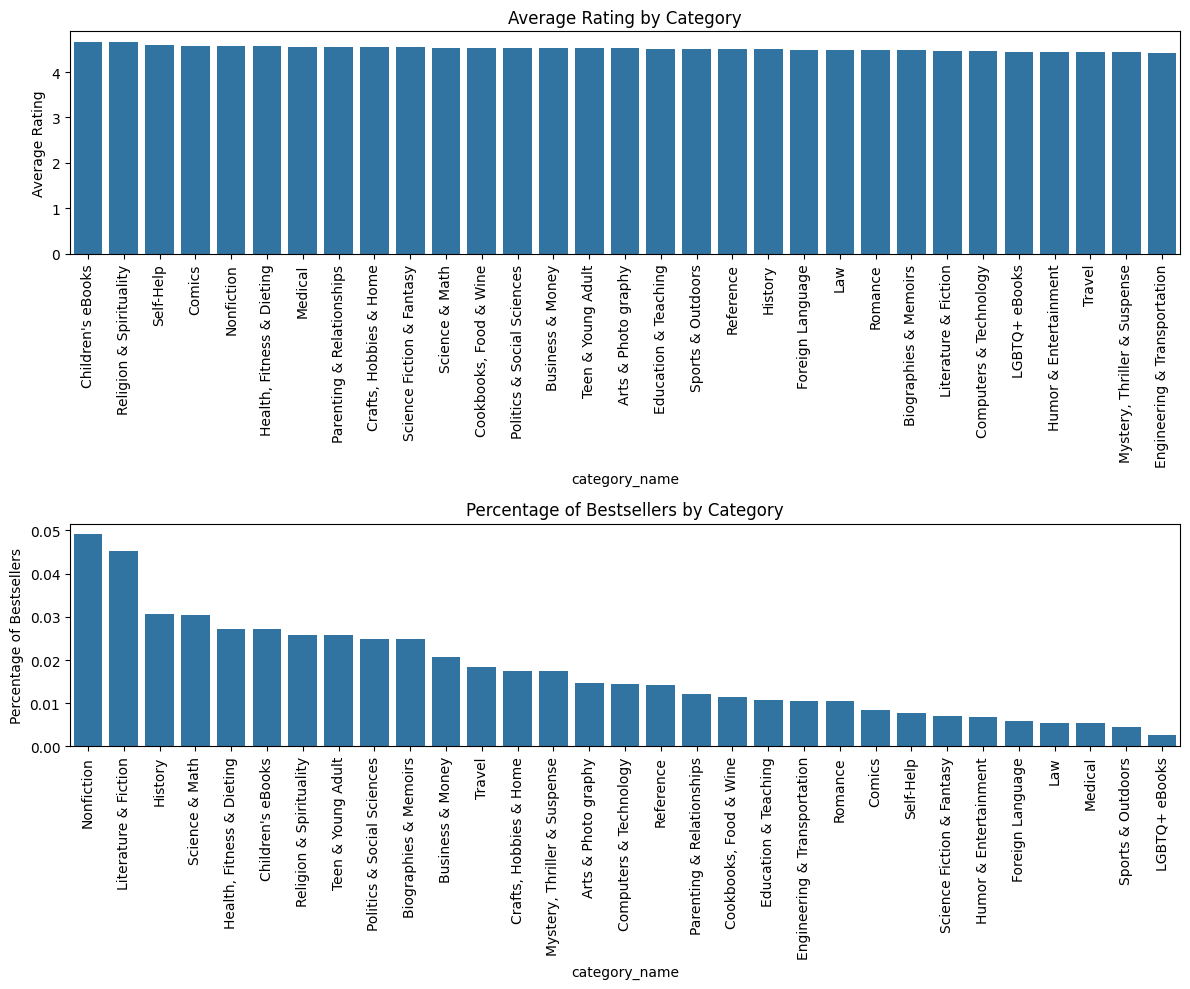

In [24]:
# Calculate average ratings for each category
avg_rating_by_category = work_df.groupby('category_name')['stars'].mean().sort_values(ascending=False)
avg_bestseller_by_category = work_df.groupby('category_name')['isBestSeller'].mean().sort_values(ascending=False)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for average rating by category
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, ax=axes[0])
axes[0].set_title('Average Rating by Category')
axes[0].set_ylabel('Average Rating')
axes[0].set_xticklabels(avg_rating_by_category.index, rotation=90)

# Bar plot for percentage of bestsellers by category
sns.barplot(x=avg_bestseller_by_category.index, y=avg_bestseller_by_category.values, ax=axes[1])
axes[1].set_title('Percentage of Bestsellers by Category')
axes[1].set_ylabel('Percentage of Bestsellers')
axes[1].set_xticklabels(avg_bestseller_by_category.index, rotation=90)

plt.tight_layout()
plt.show()

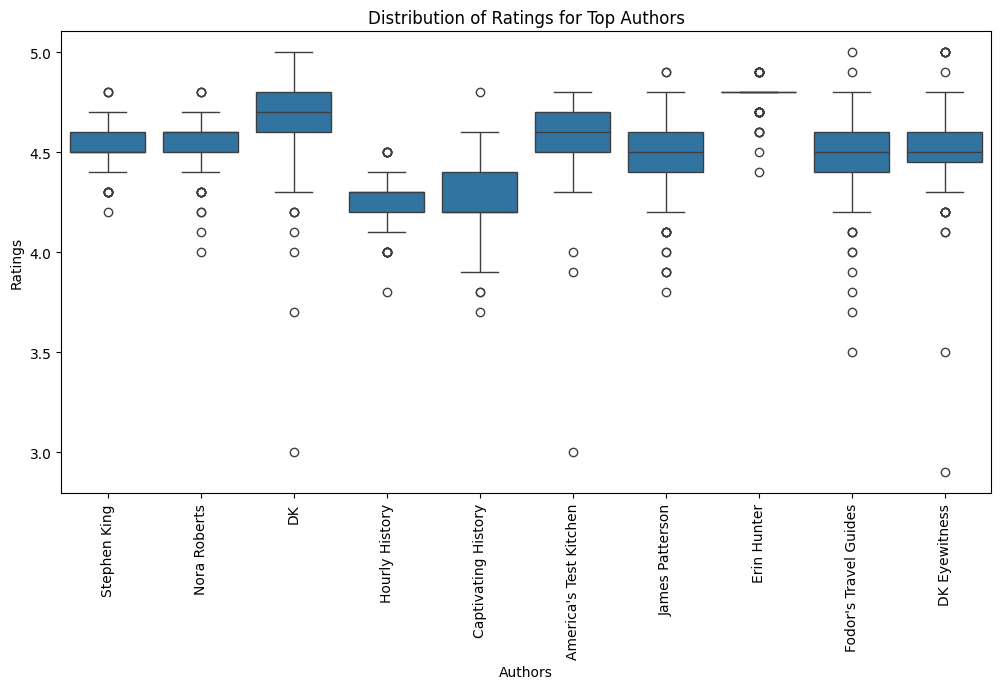

In [25]:
# Calculate average ratings for the top authors
top_authors = work_df['author'].value_counts().nlargest(10).index
boxplot_data = work_df[work_df['author'].isin(top_authors)]

# Create box plot for top authors
plt.figure(figsize=(12, 6))
sns.boxplot(x='author', y='stars', data=boxplot_data)
plt.title('Distribution of Ratings for Top Authors')
plt.xlabel('Authors')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\2206639146.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bestseller_count = work_df.groupby('price_range')['isBestSeller'].sum()
C:\Users\arnol\AppData\Local\Temp\ipykernel_14216\2206639146.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_bestsellers_sorted.index, y=percentage_bestsellers_sorted.values, palette='Greens')


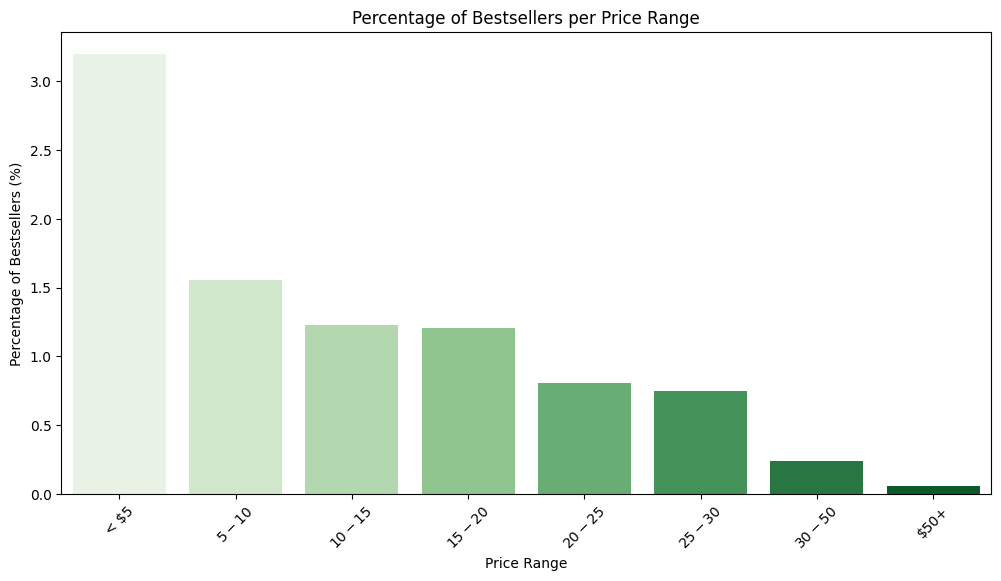

In [26]:
# Define price ranges (bins)
bins = [0, 5, 10, 15, 20, 25, 30, 50, 100]  # Adjust ranges as needed
labels = ['< $5', '$5 - $10', '$10 - $15', '$15 - $20', '$20 - $25', '$25 - $30', '$30 - $50', '$50+']

# Create a new column for price ranges
work_df['price_range'] = pd.cut(work_df['price'], bins=bins, labels=labels, right=False)

# Calculate the total number of books and the number of bestsellers in each price range
bestseller_count = work_df.groupby('price_range')['isBestSeller'].sum()
total_count = work_df['price_range'].value_counts()

# Calculate the percentage of bestsellers
percentage_bestsellers = (bestseller_count / total_count) * 100

# Sort the results by price range
percentage_bestsellers_sorted = percentage_bestsellers.sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_bestsellers_sorted.index, y=percentage_bestsellers_sorted.values, palette='Greens')
plt.title('Percentage of Bestsellers per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Bestsellers (%)')
plt.xticks(rotation=45)
plt.show()